<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">pyVIRUS</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);"><b style=color:red;>Virus</b> modelling</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
<td><img style="height: 150px;" src="images/pyVIRUS.png"></td>
</tr>
</table>

----
# `pyVIRUS`

pyVIRUS, a program package for for modelling the spread and containment of a virus in a population.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os, csv, datetime
import libVIRUS

----
In this notebook, we read the global data set of Corona data, and extract data for a **single country** and plot them.
## Read global data set

In [2]:
times,dataConfirmed,dataRecovered,dataDeath,ndataUsed = libVIRUS.coronaReadDataGlobal()

ndataConfirmed:  681
ndataRecovered:  681
ndataDeath:      681
11/28/21
Last date used:  7/1/21 526


----
## Country data
In this step, we extract data for a **single country** and plot them. We define two functions:
- `coronaGetDataCountry`, extract the country data from the global data set and create time as `datetime`  object
- `coronaPlotDataCountry`, plot data for country.

In [3]:
def coronaGetDataCountry(times,
                         dataConfirmed,dataRecovered,dataDeath,ndataUsed,
                         province='',country='Germany'):
    """
    Corona virus
    Extract country data
    input:
      times    - array of days (string format m/d/yyyy)
      dataConfirmed    - number of confirmed infections (per country per day)
      dataRecovered    - number of recovered persons (per country per day)
      dataDeath        - number of death persons (per country per day)
      ndataUsed        - number of data points used (limited by choice of timeEnd)
      province,country - province and country name (defaults)
    output:
      time             - dates as datetime string
      countryConfirmed - number of confirmed cases per day 
      countryRecovered - number of recovered cases per day
      countryDeath     - number of dead cases per day
      countryInvected  - number of infected cases per day (calculated)
    """
    # define arrays
    time          = np.empty(0)
    countryConfirmed = np.zeros(ndataUsed-4,dtype='int')
    countryDeath     = np.zeros(ndataUsed-4,dtype='int')
    countryRecovered = np.zeros(ndataUsed-4,dtype='int')
    countryInvected  = np.zeros(ndataUsed-4,dtype='int')

    # create datetime string
    for itimes in times[0:ndataUsed-4]:
        sep = itimes.split('/')
        d = int(sep[1])
        m = int(sep[0])
        y = int(sep[2])+2000
        time = np.append(time,datetime.date(y,m,d))
        
    # extract data for specific country
    for line in dataConfirmed:
        if (line[0] == province and line[1] == country):
            for i in range(4,ndataUsed):
                countryConfirmed[i-4] = countryConfirmed[i-4] + int(float((line[i])))
    for line in dataRecovered:
        if (line[0] == province and line[1] == country):
            for i in range(4,ndataUsed):
                countryRecovered[i-4] = countryRecovered[i-4] + int(float((line[i])))
    for line in dataDeath:
        if (line[0] == province and line[1] == country):
            for i in range(4,ndataUsed):
                countryDeath[i-4] = countryDeath[i-4] + int(float((line[i])))
    countryInvected = countryConfirmed - countryDeath - countryRecovered
    return time,countryConfirmed,countryRecovered,countryDeath,countryInvected

In [4]:
def coronaPlotDataCountry(time,countryConfirmed,countryRecovered,countryDeath,ndataUsed,country='Germany'):
    """
    Corona virus
    Plot country data
    input:
      time             - dates as datetime string
      countryConfirmed - number of confirmed cases per day 
      countryRecovered - number of recovered cases per day
      countryDeath     - number of dead cases per day
      countryInvected  - number of infected cases per day (calculated)
      ndataUsed        - number of data points used (limited by choice of timeEnd)
    output:
      (to file)
    """
    scale = 1e6
    plt.figure(figsize=(12.0,6.0))
    plt.title('Corona infections ('+country+')')
    plt.xlabel('Time')
    plt.xticks(rotation=45)
    plt.ylabel('Mill. people')
    #plt.plot(time,cor_invected/scale,linewidth='2',color='red',alpha=0.5,label='invected')
    plt.plot(time,countryConfirmed/scale,linewidth='4',color='blue',label='confirmed')
    plt.plot(time,countryDeath/scale,linewidth='4',color='black',label='dead')
    plt.plot(time,countryRecovered/scale,linewidth='4',color='green',label='recovered')
    
    #plt.text(time[ndataUsed-5],cor_invected[ndataUsed-5]/scale,str(cor_invected[ndataUsed-5]),
    #         fontsize=12,color='red',horizontalalignment='left',verticalalignment='center')
    plt.text(time[ndataUsed-5],countryConfirmed[ndataUsed-5]/scale,str(countryConfirmed[ndataUsed-5]),
             fontsize=12,color='blue',horizontalalignment='left',verticalalignment='center')
    plt.text(time[ndataUsed-5],countryDeath[ndataUsed-5]/scale,str(countryDeath[ndataUsed-5]),
             fontsize=12,color='black',horizontalalignment='left',verticalalignment='center')
    plt.text(time[ndataUsed-5],countryRecovered[ndataUsed-5]/scale,str(countryRecovered[ndataUsed-5]),
             fontsize=12,color='green',horizontalalignment='left',verticalalignment='center')
    plt.grid()
    plt.legend()
    return

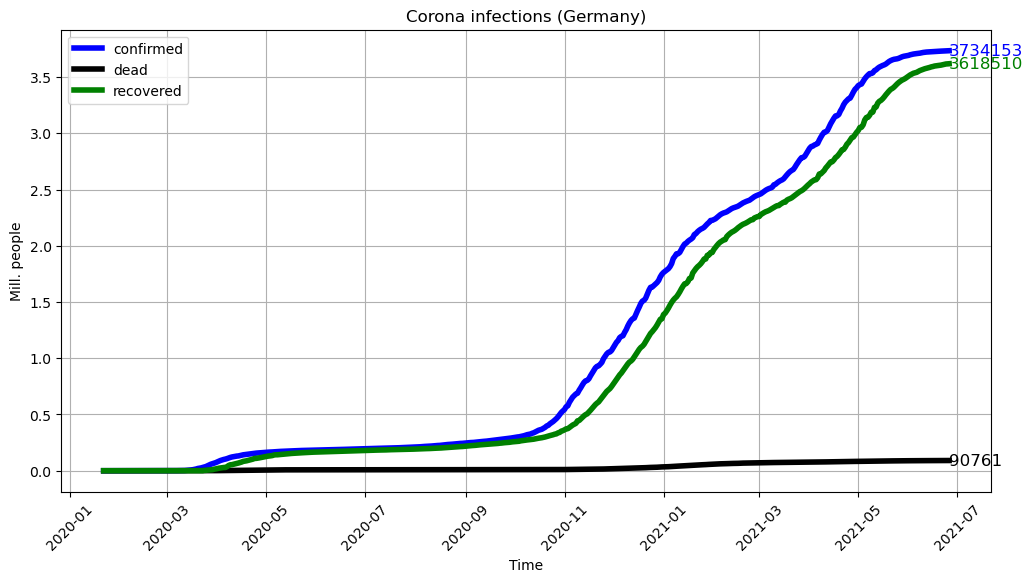

In [5]:
time,countryConfirmed,countryRecovered,countryDeath,countryInvected = coronaGetDataCountry(times,dataConfirmed,
                         dataRecovered,dataDeath,ndataUsed,country='Germany')
coronaPlotDataCountry(time,countryConfirmed,countryRecovered,countryDeath,ndataUsed,country='Germany')

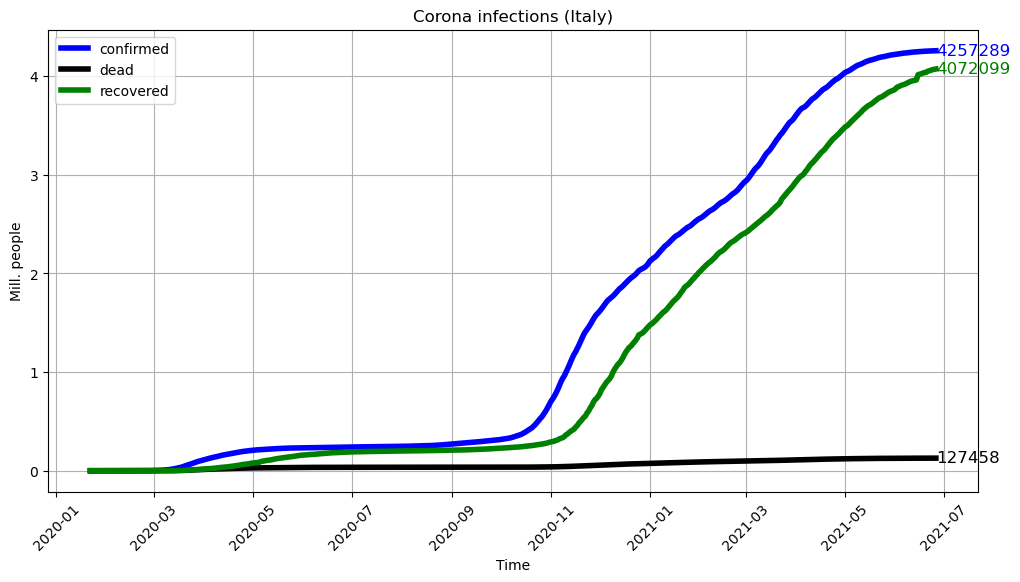

In [6]:
time,countryConfirmed,countryRecovered,countryDeath,countryInvected = coronaGetDataCountry(times,dataConfirmed,
                         dataRecovered,dataDeath,ndataUsed,country='Italy')
coronaPlotDataCountry(time,countryConfirmed,countryRecovered,countryDeath,ndataUsed,country='Italy')

----
Next, we will calculate the people currently infected ...<br>
[continue>](pyVIRUS_CoronaInfected.ipynb)

----